In [1]:
# !pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu116

# Hardware Check
### Nvidia

In [32]:
!nvidia-smi

Wed May 22 18:03:13 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 552.22                 Driver Version: 552.22         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1650      WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   51C    P8              4W /   65W |     586MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### Utralytics Check:

In [33]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196  Python-3.11.9 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)
Setup complete  (12 CPUs, 23.8 GB RAM, 322.7/811.5 GB disk)


### CUDA Check:

In [34]:
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.7096, 0.3834, 0.5214],
        [0.7359, 0.3496, 0.2691],
        [0.0202, 0.6405, 0.5536],
        [0.5581, 0.6141, 0.7911],
        [0.3005, 0.4580, 0.7195]])


In [35]:
import torch
print(torch.version.cuda)
print(torch.cuda.is_available())

12.1
True


### Inference

##### Using CLI

In [6]:
# !yolo task=segment mode=predict model=Model\best.pt conf=0.25 source=dataset\test save=true show_boxes=true

In [7]:
# import glob
# from IPython.display import Image, display

# for image_path in glob.glob(f'runs/segment/predict/*.png')[:3]:
#       display(Image(filename=image_path, height=600))
#       print("\n")

##### Using Python Code

In [36]:
from PIL import Image as img
from ultralytics import YOLO
import glob
from IPython.display import Image, display
import cv2
import os


image 1/1 d:\Coding\Lamzing\Computer Vision in Poultry\chicken-monitoring\chicken_monitoring\images_inference\..\assets\datasets\images\IMG_20240521_190543_526.jpg: 448x640 2 chickens, 42.5ms
Speed: 2.0ms preprocess, 42.5ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 d:\Coding\Lamzing\Computer Vision in Poultry\chicken-monitoring\chicken_monitoring\images_inference\..\assets\datasets\images\IMG_20240521_190549_149.jpg: 640x640 10 chickens, 57.2ms
Speed: 6.2ms preprocess, 57.2ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 d:\Coding\Lamzing\Computer Vision in Poultry\chicken-monitoring\chicken_monitoring\images_inference\..\assets\datasets\images\IMG_20240521_190552_657.jpg: 384x640 10 chickens, 31.5ms
Speed: 4.0ms preprocess, 31.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 d:\Coding\Lamzing\Computer Vision in Poultry\chicken-monitoring\chicken_monitoring\images_inference\..\assets\dataset

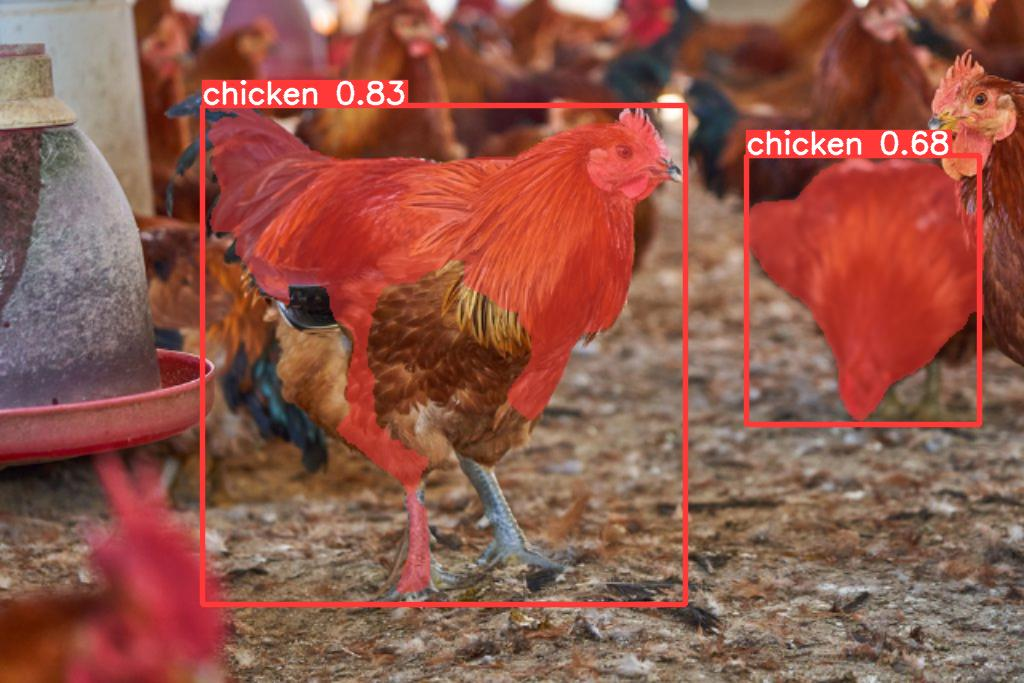

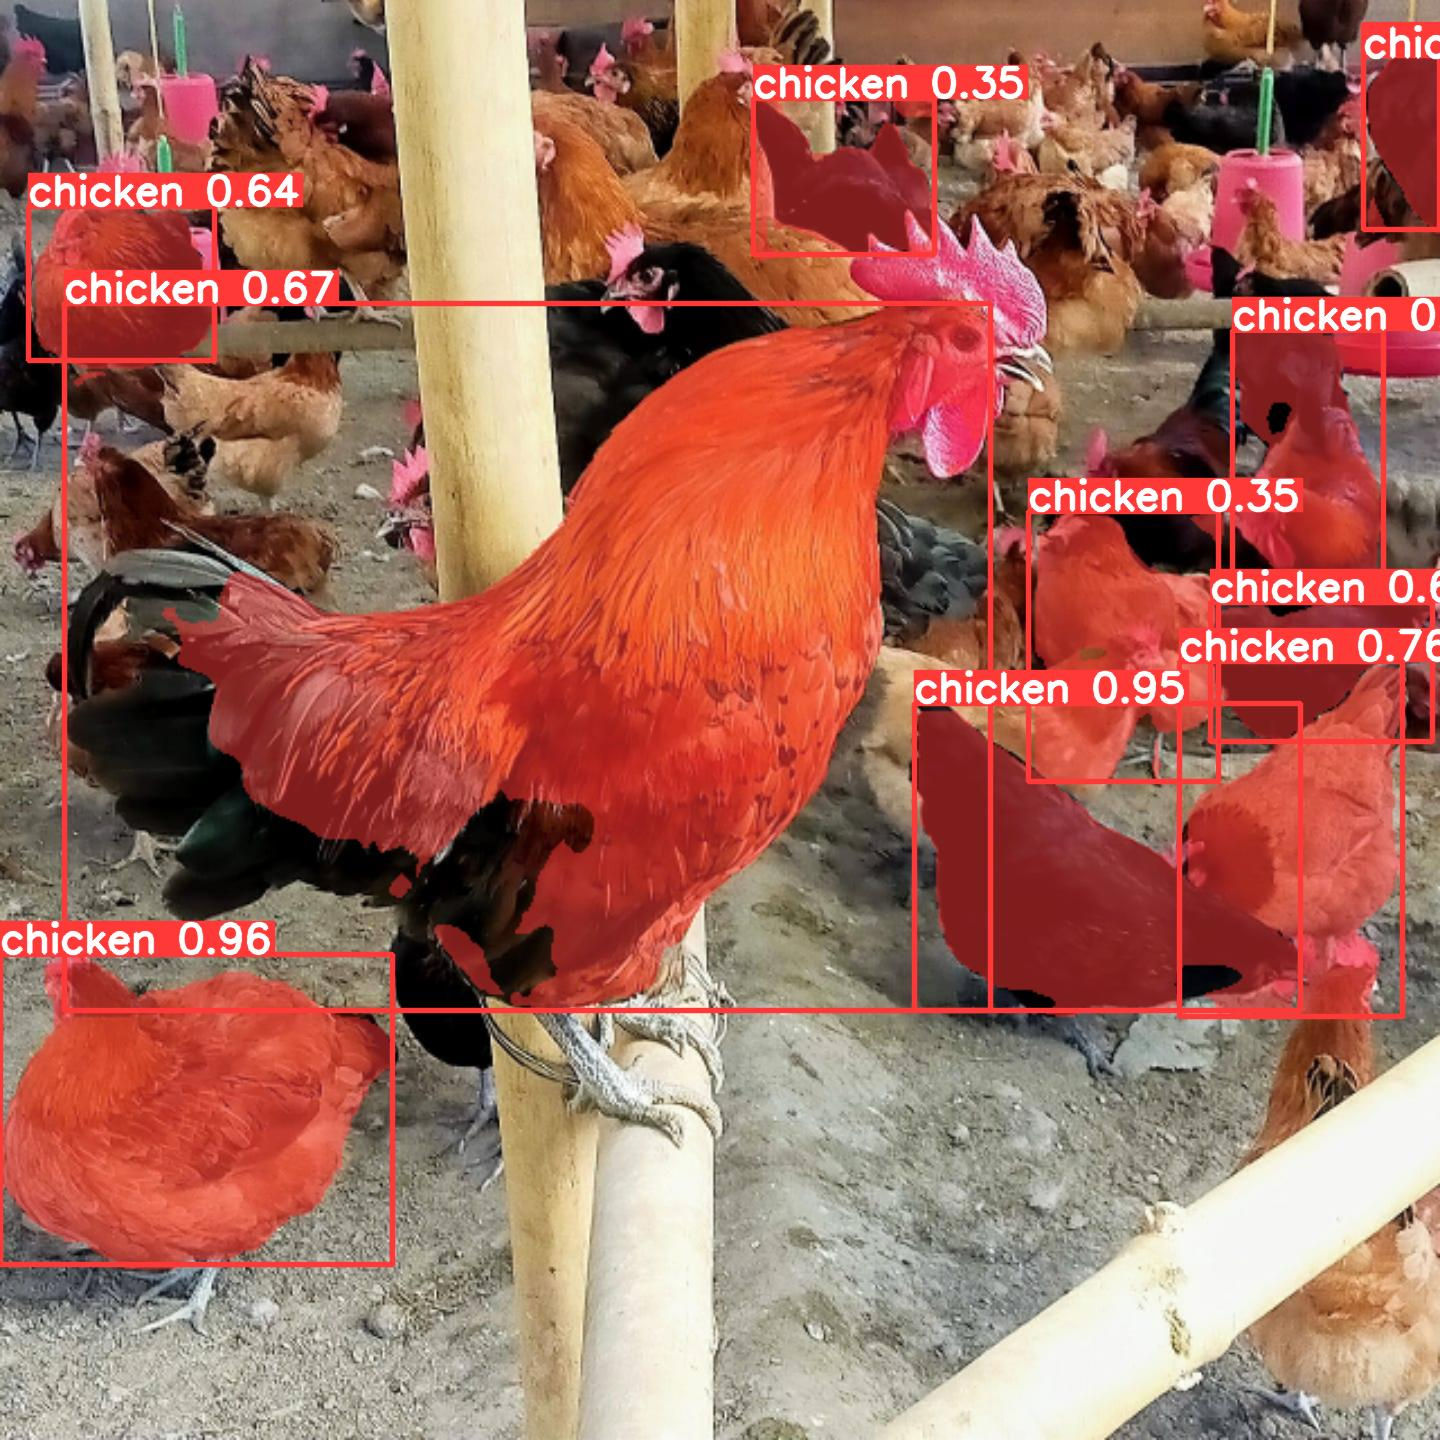

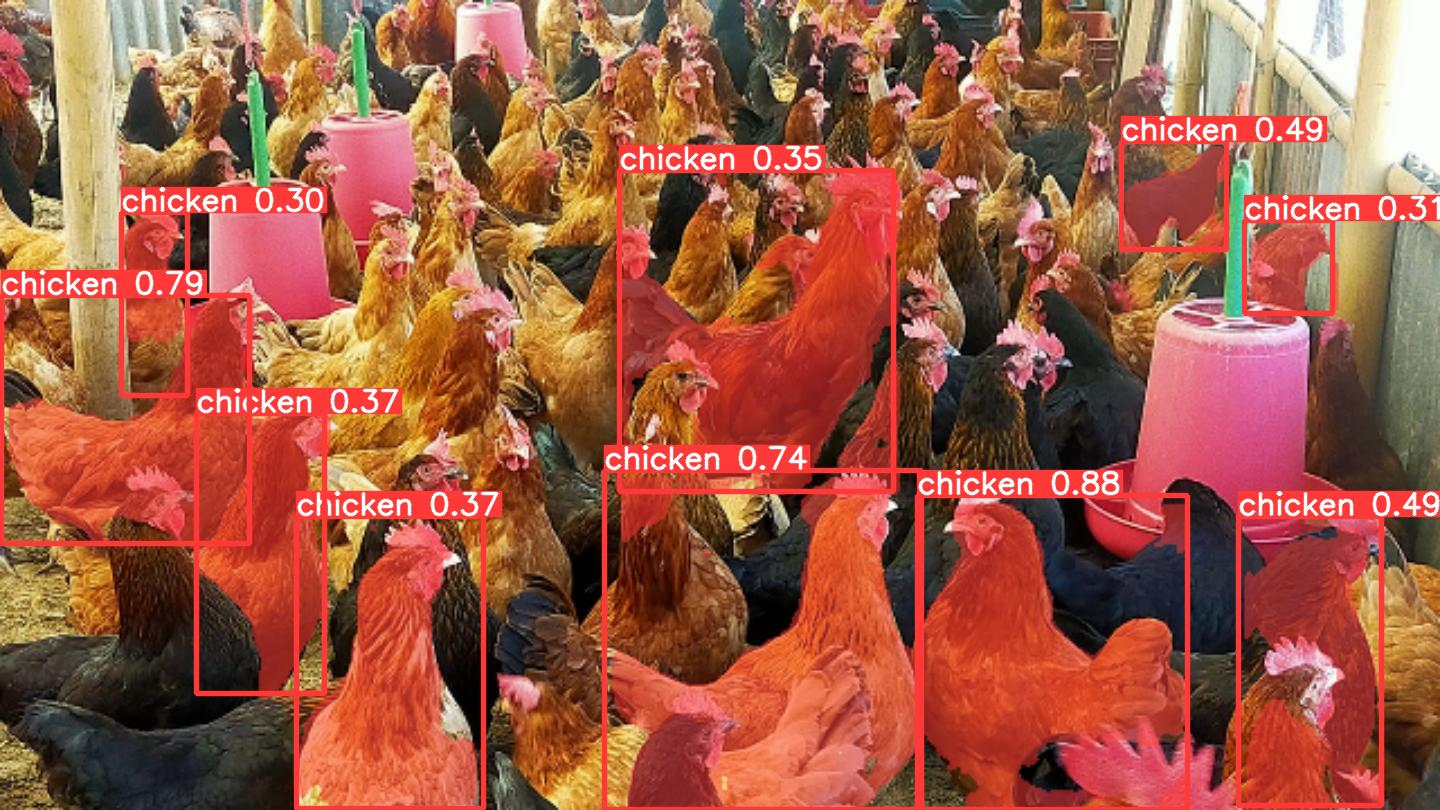

In [37]:
model = YOLO('../assets/model/chicken.pt')  
test_images_dir = '../assets/datasets/images/' # Directory containing test images
# Create the Outputs directory if it doesn't exist
outputs_dir = 'Outputs'
if not os.path.exists(outputs_dir):
    os.makedirs(outputs_dir)

all_results = []

for filename in os.listdir(test_images_dir):
    if filename.endswith('.jpg'):
        # Construct full path to the current image
        image_path = os.path.join(test_images_dir, filename)
        # Perform inference on the current image
        result = model(image_path)
        all_results.append(result)

        # Process and save each result
        for r in result:
            im_array = r.plot()  # Get the NumPy array
            im_array = cv2.cvtColor(im_array, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            im = img.fromarray(im_array)  # Create PIL Image from NumPy array
            output_filename = f"{os.path.splitext(filename)[0]}_result.jpg"
            output_path = os.path.join(outputs_dir, output_filename)
            im.save(output_path)  # Save the processed image

# Display the result images
for image_path in glob.glob(f'Outputs/*.jpg')[:3]:
    display(Image(filename=image_path, height=600))
print("\n")

### Weight Estimation

In [38]:
import cv2
import numpy as np

In [39]:
# Print all results for debugging
for idx, result in enumerate(all_results):
    print(f"Results for image {idx + 1}:")
    for r in result:
        boxes = r.boxes  # Detected bounding boxes
        masks = r.masks  # Detected masks, if any
        names = r.names  # Class names
        orig_img = r.orig_img  # Original image
        path = r.path  # Image path

        print(f"Path: {path}")
        print(f"Boxes: {boxes}")
        print(f"Masks: {masks}")
        print(f"Names: {names}")
        print(f"Original Image Shape: {orig_img.shape}")

# Assuming you want to visualize the first result's bounding boxes
if all_results:
    first_result = all_results[0][0]
    boxes = first_result.boxes
    print(f"Bounding Boxes of first result: {boxes}")


Results for image 1:
Path: d:\Coding\Lamzing\Computer Vision in Poultry\chicken-monitoring\chicken_monitoring\images_inference\..\assets\datasets\images\IMG_20240521_190543_526.jpg
Boxes: ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 0.], device='cuda:0')
conf: tensor([0.8339, 0.6847], device='cuda:0')
data: tensor([[2.0280e+02, 1.0500e+02, 6.8535e+02, 6.0403e+02, 8.3389e-01, 0.0000e+00],
        [7.4688e+02, 1.5585e+02, 9.7953e+02, 4.2454e+02, 6.8473e-01, 0.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (683, 1024)
shape: torch.Size([2, 6])
xywh: tensor([[444.0739, 354.5154, 482.5565, 499.0246],
        [863.2008, 290.1961, 232.6492, 268.6840]], device='cuda:0')
xywhn: tensor([[0.4337, 0.5191, 0.4712, 0.7306],
        [0.8430, 0.4249, 0.2272, 0.3934]], device='cuda:0')
xyxy: tensor([[202.7956, 105.0030, 685.3521, 604.0276],
        [746.8762, 155.8540, 979.5254, 424.5381]], device='cuda:0')
xyxyn: tensor([[0.1980, 0.1537, 0.6693, 0.8844]

##### Calculate the Area of the segmented chickens

In [40]:
# Iterate through the results for each image
for image_index, result in enumerate(all_results):
    print(f"Processing results for image {image_index + 1}:")

    # Initialize a counter for each image
    counter = 1

    # Accessing the boxes, names, and masks for each image
    for r in result:
        boxes = r.boxes.xyxy.cpu().numpy()  # Convert boxes to numpy array
        labels = r.names  # Class names
        masks_data = r.masks.xy if r.masks is not None else []  # Mask data as numpy array if available

        # Iterate through detected objects
        for i, (box, mask) in enumerate(zip(boxes, masks_data)):
            label = labels[0]  # Get the class name, assuming single class 'broiler'
            if label == 'chicken':
                # Create an empty binary mask
                mask_shape = r.orig_img.shape[:2]  # Shape of the original image (height, width)
                mask_binary = np.zeros(mask_shape, dtype=np.uint8)

                # Convert mask segments to polygon format
                polygon = np.array(mask, dtype=np.int32).reshape((-1, 1, 2))

                # Fill the binary mask with the polygon
                cv2.fillPoly(mask_binary, [polygon], 255)

                # Find contours in the mask
                contours, _ = cv2.findContours(mask_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

                # Calculate the area of each contour
                area = 0
                for contour in contours:
                    area += cv2.contourArea(contour)
                print(f"Area of {label} {counter}: {area} pixels")
                # Increment counter
                counter += 1
    print("\n")


Processing results for image 1:
Area of chicken 1: 76389.5 pixels
Area of chicken 2: 38392.5 pixels


Processing results for image 2:
Area of chicken 1: 85622.5 pixels
Area of chicken 2: 61200.5 pixels
Area of chicken 3: 43036.0 pixels
Area of chicken 4: 255869.5 pixels
Area of chicken 5: 18991.5 pixels
Area of chicken 6: 23959.5 pixels
Area of chicken 7: 9769.5 pixels
Area of chicken 8: 18214.5 pixels
Area of chicken 9: 36602.5 pixels
Area of chicken 10: 29497.0 pixels


Processing results for image 3:
Area of chicken 1: 45526.5 pixels
Area of chicken 2: 32708.5 pixels
Area of chicken 3: 56907.5 pixels
Area of chicken 4: 24773.5 pixels
Area of chicken 5: 6619.0 pixels
Area of chicken 6: 21190.0 pixels
Area of chicken 7: 29565.0 pixels
Area of chicken 8: 45691.5 pixels
Area of chicken 9: 4634.5 pixels
Area of chicken 10: 5706.5 pixels


Processing results for image 4:
Area of chicken 1: 38509.0 pixels
Area of chicken 2: 42034.0 pixels
Area of chicken 3: 97860.5 pixels
Area of chicken 4

In [13]:
# print('Names')
# print(labels[0])
# print('--------------------------------------------------------------------------------------')
# print('Box Shape')
# print(boxes)
# print('--------------------------------------------------------------------------------------')
# print('Mask data')
# print(masks_data)

##### Predict the weight of a chicken based on its area

In [41]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as mtp
import seaborn as sns
sns.set()

In [44]:
# Load the data from the CSV file
data = pd.read_csv('../assets/datasets/area_weight.csv')

In [45]:
data.head()

Area  Weight
0  255869.5    2501
1  126396.0    2336
2   97860.5    2235
3   85622.5    1891
4   76389.5    1747

In [46]:
data.describe()

Area       Weight
count      32.000000    32.000000
mean    45303.328125  1258.562500
std     47229.521520   468.087594
min      4634.500000   720.000000
25%     20640.375000   940.750000
50%     34655.500000  1140.000000
75%     46852.125000  1451.500000
max    255869.500000  2501.000000

In [47]:
# Split the data into features (X) and target (y)
X = data['Area'].values.reshape(-1, 1)  # Reshape the area column to a 2D array
y = data['Weight'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
LRmodel = LinearRegression()
LRmodel.fit(X_train, y_train)

# Make predictions on the test set
y_pred = LRmodel.predict(X_test)

# Print the predicted weights for the test set
for area, weight in zip(X_test, y_pred):
    print(f"Area: {area[0]}, Predicted weight: {weight:.2f}")

Area: 6619.0, Predicted weight: 938.19
Area: 36602.5, Predicted weight: 1195.95
Area: 18991.5, Predicted weight: 1044.55
Area: 29565.0, Predicted weight: 1135.45
Area: 46204.0, Predicted weight: 1278.50
Area: 45691.5, Predicted weight: 1274.09
Area: 5706.5, Predicted weight: 930.34


##### Visualizing the Training set results

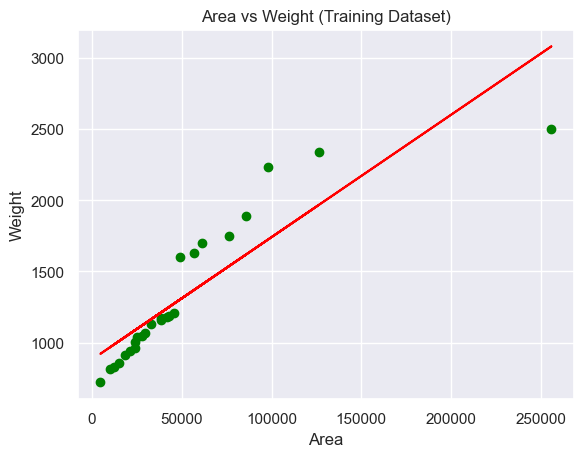

In [48]:
mtp.scatter(X_train, y_train, color="green")
mtp.plot(X_train, LRmodel.predict(X_train), color="red")
mtp.title("Area vs Weight (Training Dataset)")
mtp.xlabel("Area")
mtp.ylabel("Weight")
mtp.show()

##### Visualizing the Test set results

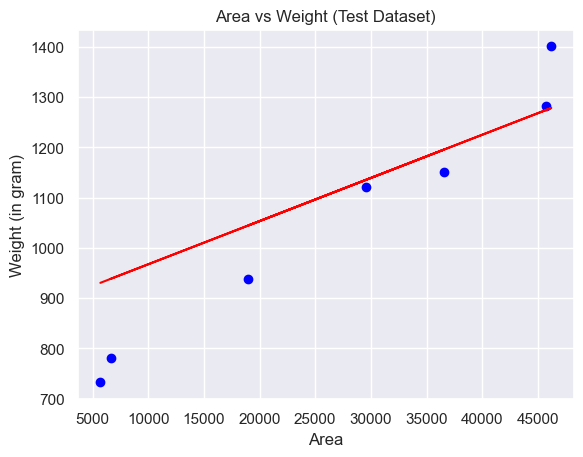

In [49]:
mtp.scatter(X_test, y_test, color="blue")
mtp.plot(X_test, y_pred, color="red")
mtp.title("Area vs Weight (Test Dataset)")
mtp.xlabel("Area")
mtp.ylabel("Weight (in gram)")
mtp.show()

##### Finding the residuals

In [50]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
# print('RMSE:', np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))

MAE: 93.27222729474354
MSE: 13263.38867352696


### Display the image with weights

In [22]:
# Accessing the boxes and names
# boxes = results[0].boxes  # Boxes in Boxes object format
# names = results[0].names  # Class names

In [51]:
# Accessing the boxes and names from the first image result
if all_results:
    first_image_results = all_results[0]  # Get the results for the first image
    if first_image_results:
        first_result = first_image_results[0]  # Get the first result of the first image
        boxes = first_result.boxes  # Boxes in Boxes object format
        names = first_result.names  # Class names

        # Print the boxes and names
        print("Boxes:", boxes)
        print("Class names:", names)
    else:
        print("No results found for the first image.")
else:
    print("No results found in all_results.")


Boxes: ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 0.], device='cuda:0')
conf: tensor([0.8339, 0.6847], device='cuda:0')
data: tensor([[2.0280e+02, 1.0500e+02, 6.8535e+02, 6.0403e+02, 8.3389e-01, 0.0000e+00],
        [7.4688e+02, 1.5585e+02, 9.7953e+02, 4.2454e+02, 6.8473e-01, 0.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (683, 1024)
shape: torch.Size([2, 6])
xywh: tensor([[444.0739, 354.5154, 482.5565, 499.0246],
        [863.2008, 290.1961, 232.6492, 268.6840]], device='cuda:0')
xywhn: tensor([[0.4337, 0.5191, 0.4712, 0.7306],
        [0.8430, 0.4249, 0.2272, 0.3934]], device='cuda:0')
xyxy: tensor([[202.7956, 105.0030, 685.3521, 604.0276],
        [746.8762, 155.8540, 979.5254, 424.5381]], device='cuda:0')
xyxyn: tensor([[0.1980, 0.1537, 0.6693, 0.8844],
        [0.7294, 0.2282, 0.9566, 0.6216]], device='cuda:0')
Class names: {0: 'chicken'}


In [24]:
# from IPython.display import clear_output
# import cv2


# img = np.array(img)  # Convert to NumPy array
# # Iterate over the detected chickens
# for i, box in enumerate(boxes):
#     x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())  # Convert coordinates to integers
#     conf = box.conf.item()
#     cls = int(box.cls.item())
#     if names[cls] == 'broiler':
#         area = (x2 - x1) * (y2 - y1)
#         predicted_weight = LRmodel.predict([[area]])  # Predict weight based on area

#         # Draw bounding box and display predicted weight
#         cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
#         cv2.putText(img, f"Weight: {predicted_weight[0]:.2f}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

# # Display the image with bounding boxes and predicted weights
# cv2.imshow('Image', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [52]:
def get_boxes_and_names(image_index, all_results):
    """
    Returns the boxes and names for the specified image index.

    Args:
        image_index (int): The index of the image in the all_results list.
        all_results (list): A list containing the object detection results for all images.

    Returns:
        tuple: A tuple containing two lists: (boxes, names).
               boxes (list): A list of bounding box objects (Boxes format).
               names (list): A list of class names corresponding to the detected objects.
    """
    if all_results:
        image_results = all_results[image_index]
        if image_results:
            result = image_results[0]
            boxes = result.boxes
            names = result.names
            return boxes, names
    return [], []

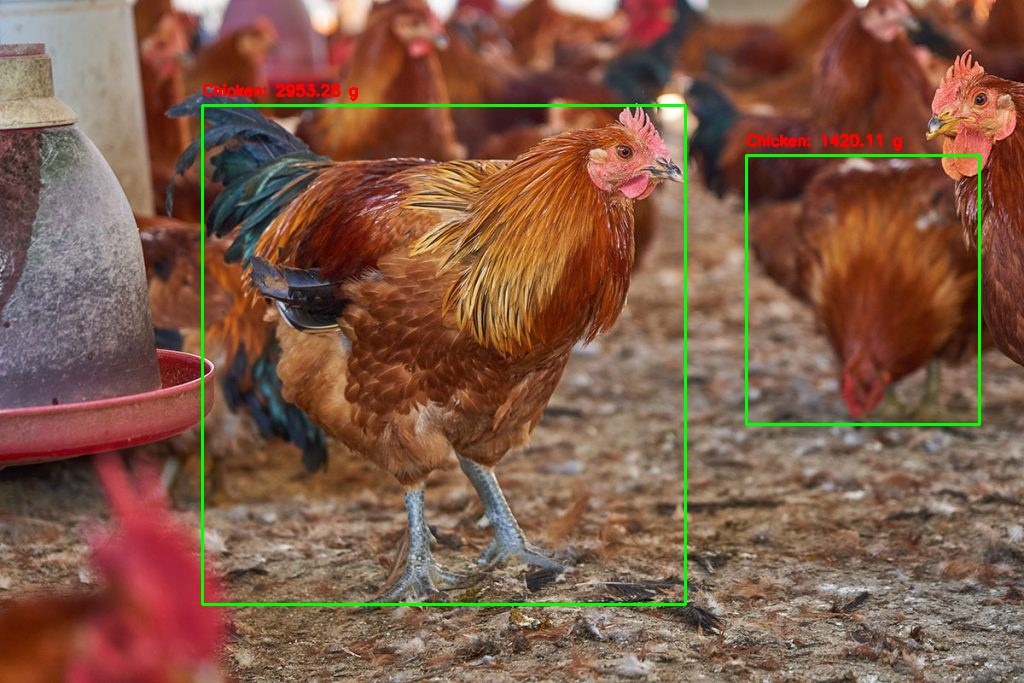

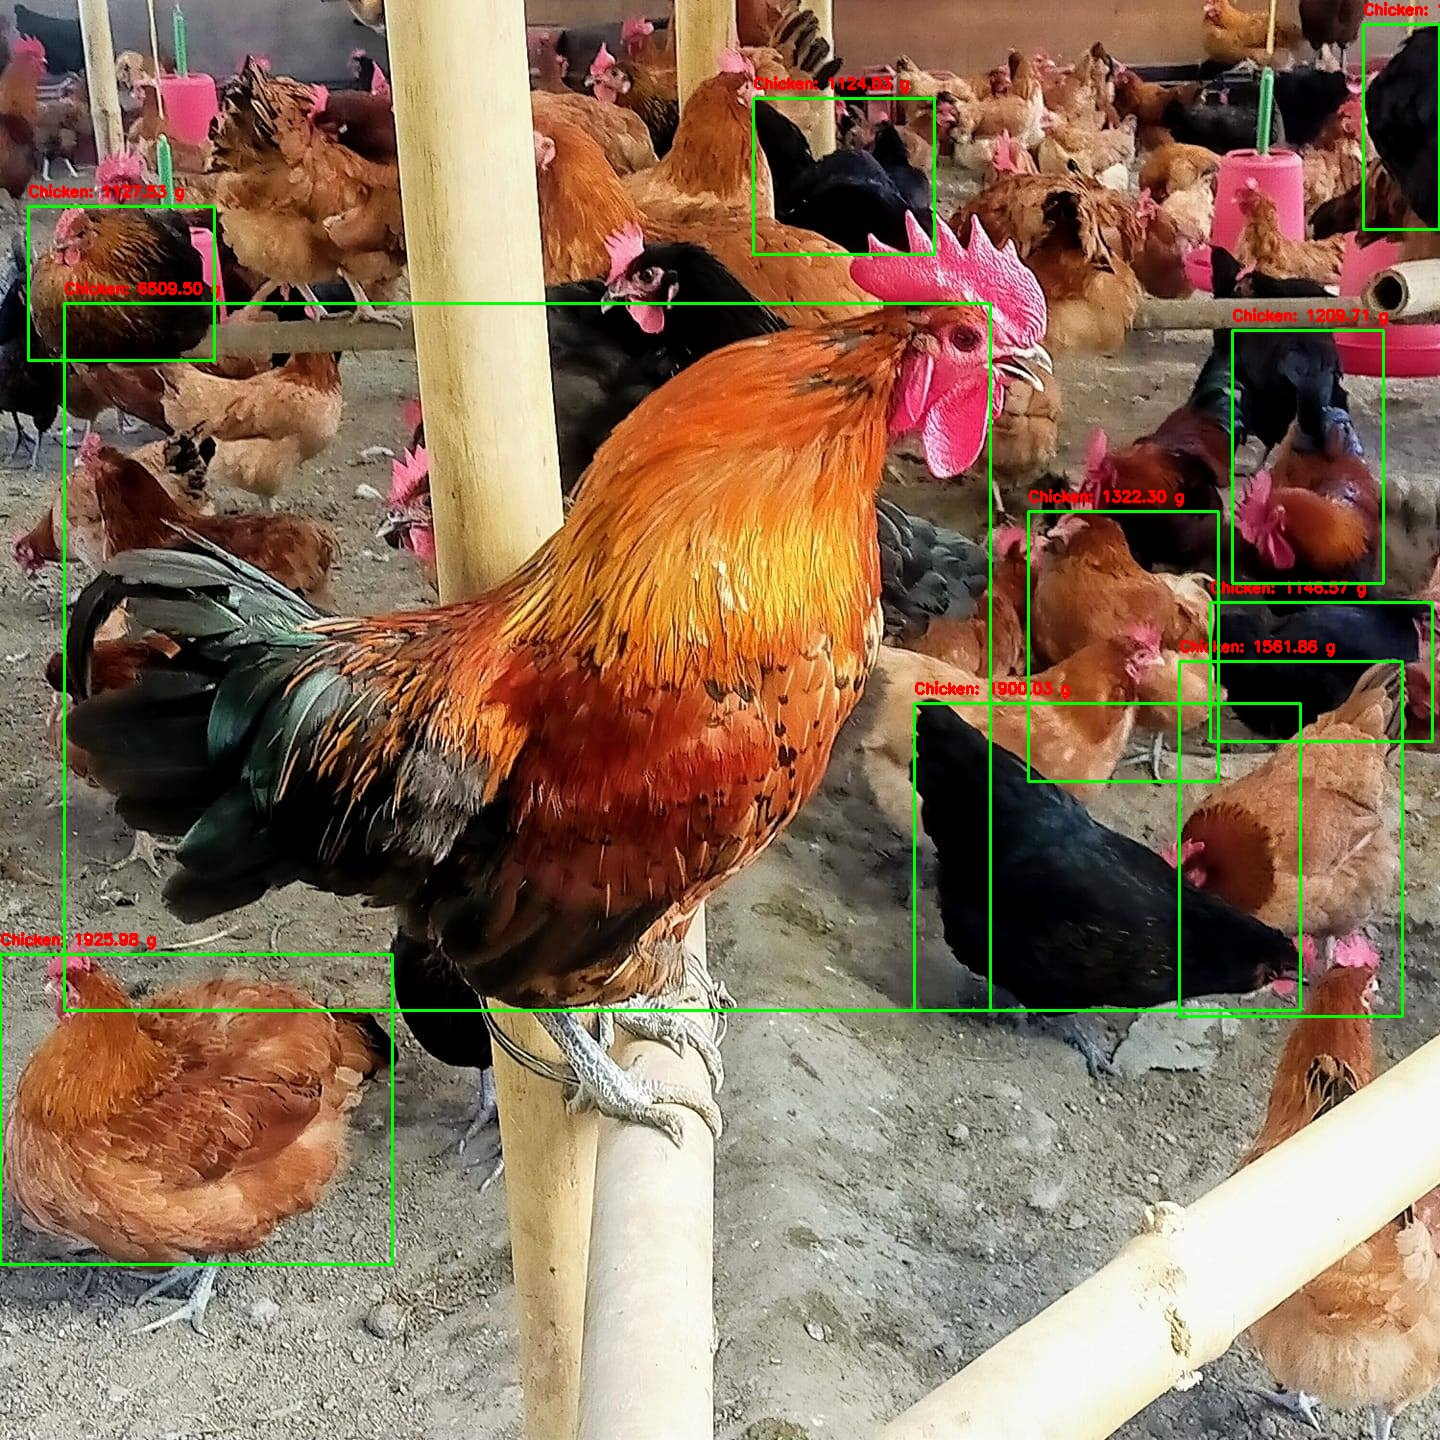

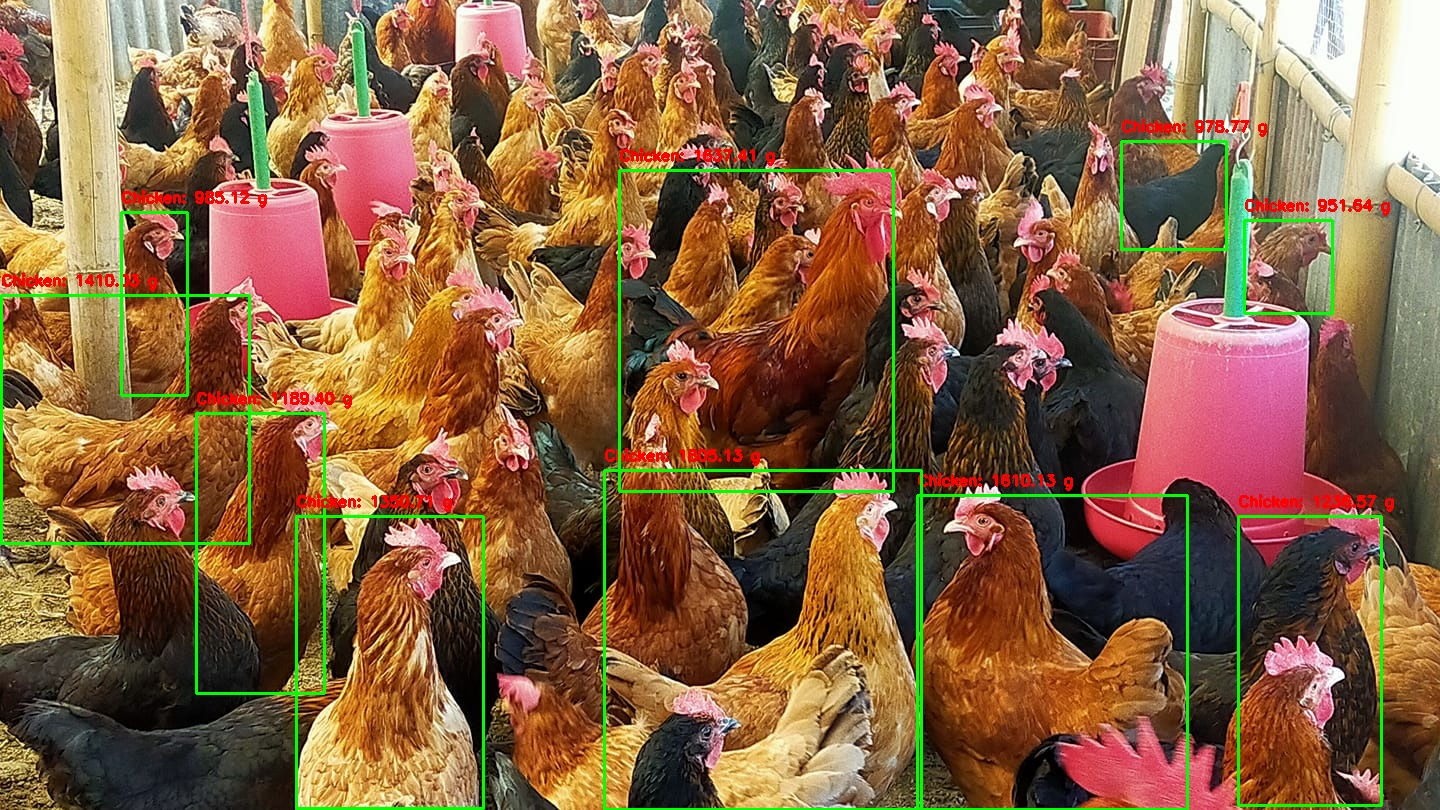

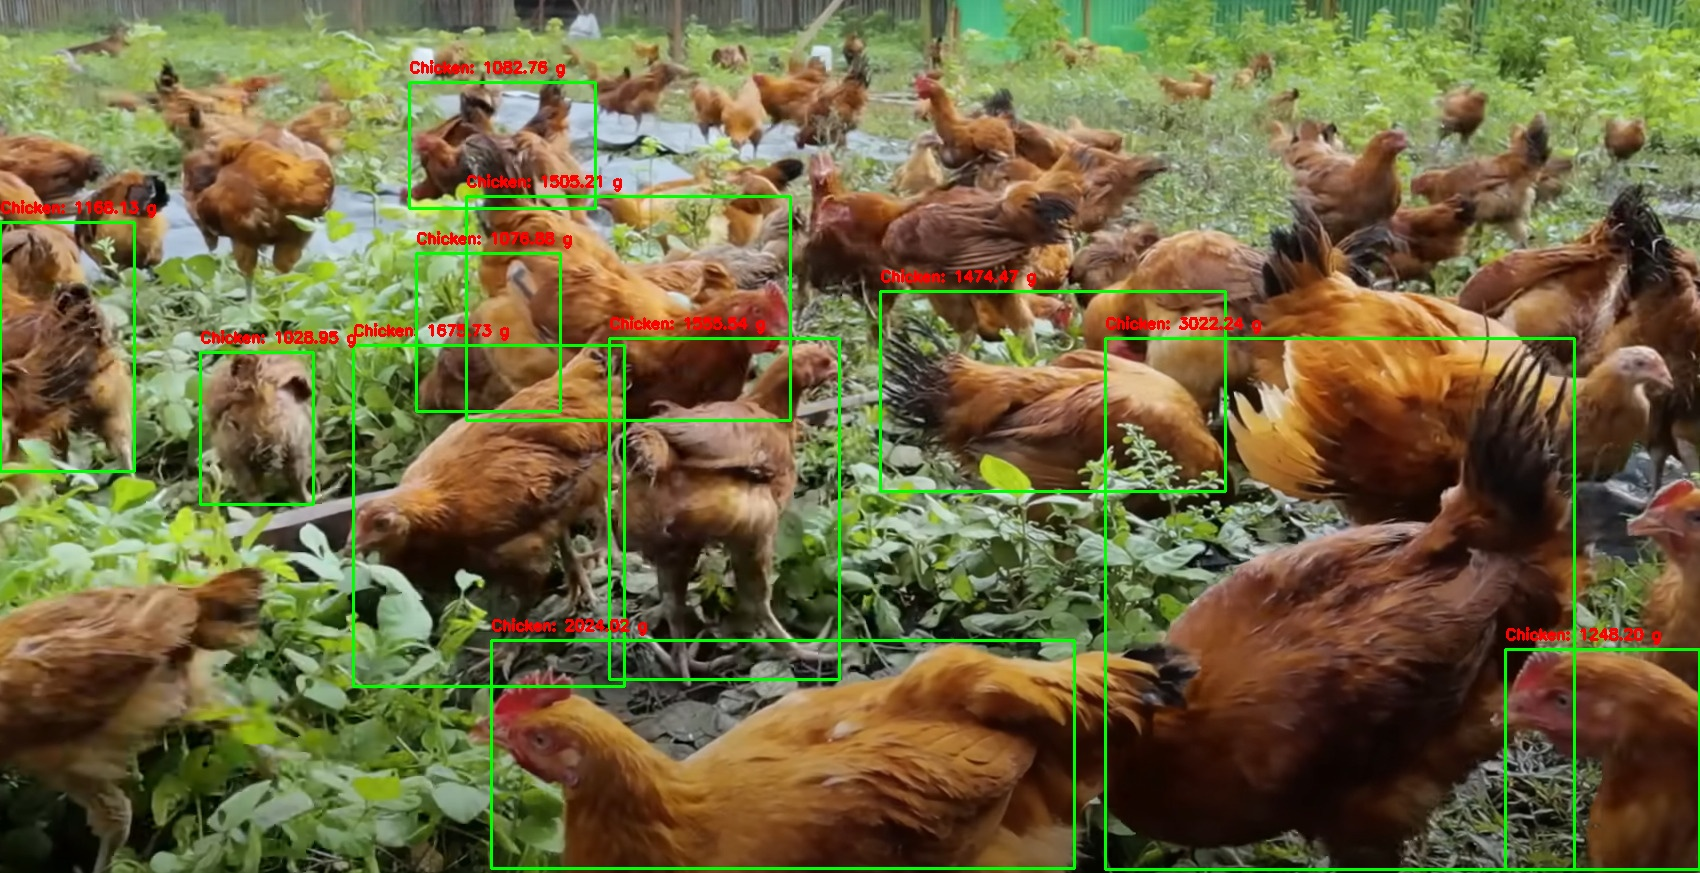

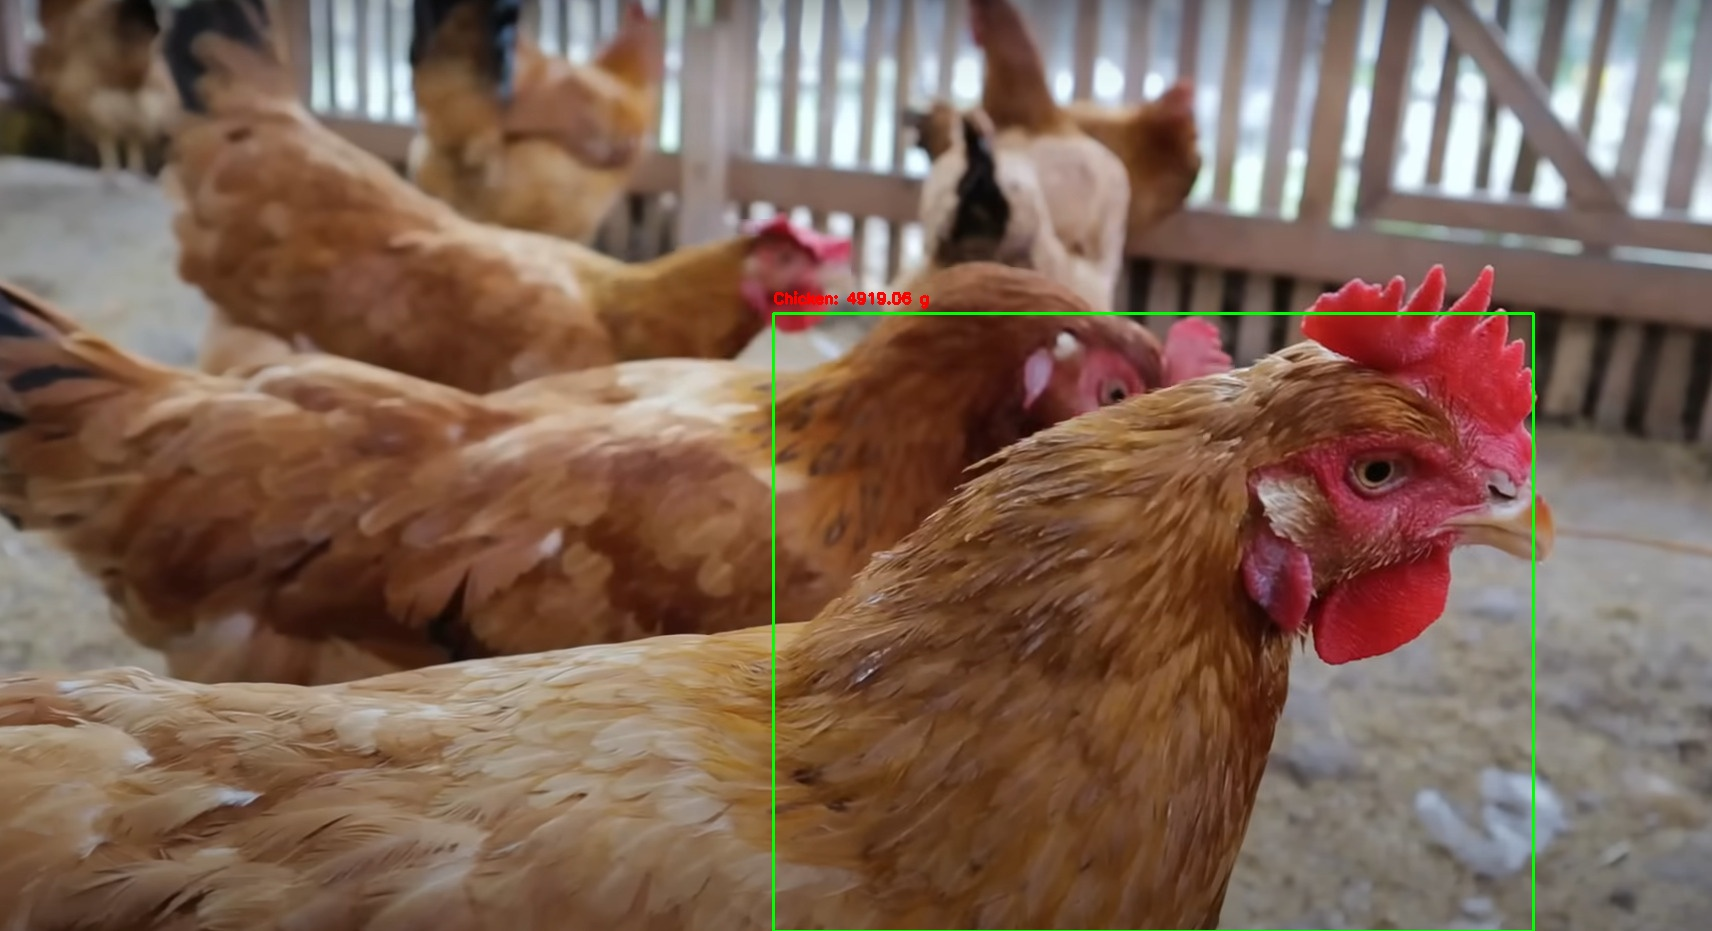

In [53]:
import os
import cv2
from IPython.display import Image, display

# Define the folder containing the images
folder_path = '../assets/datasets/images'

# Create a list of all PNG file paths in the folder
image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.jpg')]

for i, image_path in enumerate(image_files):
    # Load the image
    img = cv2.imread(image_path)

    # Check if the image is loaded successfully
    if img is None:
        print(f"Error: Unable to load image {image_path}")
        continue

    # Get the boxes and names for the current image
    boxes, names = get_boxes_and_names(i, all_results)

    # Iterate over the detected chickens
    for j, box in enumerate(boxes):
        x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())  # Convert coordinates to integers
        conf = box.conf.item()
        cls = int(box.cls.item())
        if names[cls] == 'chicken':
            area = (x2 - x1) * (y2 - y1)
            predicted_weight = LRmodel.predict([[area]])  # Predict weight based on area

            # Draw bounding box and display predicted weight
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, f"Chicken: {predicted_weight[0]:.2f} g", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                        (0, 0, 255), 2)

    # Save the modified image temporarily
    temp_image_path = 'temp_image.jpg'
    cv2.imwrite(temp_image_path, img)

    # Display the image with bounding boxes and predicted weights
    display(Image(temp_image_path))

    # Remove the temporary image file
    os.remove(temp_image_path)